#Pinellas County Property Appraiser's Office Sales Data EDA

Table of Contents

1.   Import packages and data
2.   Get a sense of how much data is missing/NA
3.   Check addresses. Are there values missing? Do all values related in a record match?
4.   Convert sales_date data to the proper datetime type. Create a sales_year column.





The Pinellas County Property Appraiser's Office Sales Dataset has a record of sales for each parcel. Along with the record of each parcel sale is a description of its current features such as interior and exterior finishes, the county's just-market value, assessed-taxable value, etc.

This project is going to be focused on predicting sales prices for houses based on key features.

#1. Import Packages and Data

We want pandas, numpy, and matplotlib.

Importing the sales data with pd.read_csv('file_path',low_memory=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Course/Capstone Work/PCPAOSalesDATA.csv', low_memory=False)

#2. How sparse is the data?


1.   Get .info() on the dataframe to see how many columns are empty.
2.   Make note of the column names

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155164 entries, 0 to 1155163
Data columns (total 54 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   PARCEL_NUMBER        1155164 non-null  object 
 1   OWNER1               1155134 non-null  object 
 2   OWNER2               624705 non-null   object 
 3   SITE_ADDRESS         1155160 non-null  object 
 4   SITE_CITYZIP         1155164 non-null  object 
 5   SUBDIVISION          1147546 non-null  object 
 6   LAND_SIZE            760559 non-null   object 
 7   TOTAL_LIVING_SQFT    1155156 non-null  float64
 8   TOTAL_GROSS_SQFT     1155156 non-null  float64
 9   NBORHOOD_CD          1155164 non-null  float64
 10  YEAR_BUILT_BLD1      1155098 non-null  float64
 11  TOTAL_LIVING_UNITS   1155156 non-null  float64
 12  ACREAGE              1155164 non-null  float64
 13  CNTY_JST_VALUE       1155164 non-null  int64  
 14  CNTY_ASD_VALUE       1155164 non-null  int64  
 15

Thoughts and information about the columns:

**PARCEL_NUMBER** has 1155164 non-null objects(text) that should be the property ids.

**OWNER1** has 1155134 non-null objects(text) and **OWNER2** has 624705 non-null   object. This set of data could probably be dropped. The owner columns are the current owners, even on old sales. It does not track grantor/grantee info.

**SITE_ADDRESS**(1155160 non-null  objects) and **SITE_CITYZIP**(1155164 non-null objects) give a reasonable address. There are 4 site_addresses missing, all for the same parcel_number. The parcel seems to have an address of 205 EMERALD LN, LARGO, FL, 33771

**STR_NUM**(1155164 non-null  int64), **STR_PFX**(40900 non-null object), **STR_NAME**(1155160 non-null objects)**STR_SFX** (1133155 non-null  object), **STR_SFX_DIR**(468208 non-null object), **STR_CITY**(1155160 non-null  object), and **STR_ZIP**(1155160 non-null  object) give the same information broken down into smaller chunks. **It will be useful when matching properties to other datasets if necessary.**

 5.   SUBDIVISION          1147546 non-null  object
 6.   LAND_SIZE            760559 non-null   object
 7.   TOTAL_LIVING_SQFT    1155156 non-null  float64
 8.   TOTAL_GROSS_SQFT     1155156 non-null  float64
 9.   NBORHOOD_CD          1155164 non-null  float64
 10.  YEAR_BUILT_BLD1      1155098 non-null  float64   Is this actually true
 11.  TOTAL_LIVING_UNITS   1155156 non-null  float64
 12.  ACREAGE              1155164 non-null  float64
 13.  CNTY_JST_VALUE       1155164 non-null  int64  
 14.  CNTY_ASD_VALUE       1155164 non-null  int64  
 15.  CNTY_TAXABLE_VALUE   1155164 non-null  int64  
 16.  TAX_DIST_DSCR        1155079 non-null  object
 17.  SPECIAL_ASSESSMENT   1155079 non-null  float64
 18.  JUST_LAND            1155164 non-null  int64  
 19.  JUST_BUILDING        1155164 non-null  int64  
 20.  JUST_EXTRA_FEATURES  1155164 non-null  int64  
 21.  PROPERTY_USE         1155164 non-null  object
 22.  SALES_DATE           1155164 non-null  object    How far back does this go?
 23.  PRICE                1155164 non-null  int64  
 24.  QU_FLG               1155164 non-null  object
 25.  SEAWALL              1152774 non-null  object
 26.  FRONTAGE             151205 non-null   object
 27.  VIEWS                23763 non-null    object
 28.  CONTAMINATION_YN     1155164 non-null  object
 29.  SUBSIDENCE_YN        1155164 non-null  object
 30.  DLHL_YN              1155164 non-null  object
 31.  EVAC_ZONE            1155164 non-null  object
 32.
 33.  LAND_AREA_SF         1155164 non-null  int64  
 34.  POOL                 1155164 non-null  object
 35.  WATERFRONT_YN        1155164 non-null  object
 42.  EFFECTIVE_AGE        762490 non-null   float64
 43.  COOLING              737738 non-null   object
 44.  EXTERIOR_WALLS       1155156 non-null  object
 45.  RCN                  1155156 non-null  float64  **This is Reconstruction Costs New**
 46.  FLOOR_FINISH         760565 non-null   object
 47.  FLOOR_SYSTEM         760565 non-null   object
 48.  FOUNDATION           760561 non-null   object
 49.  INTERIOR_FINISH      760565 non-null   object
 50.  LIVING_UNITS         1153175 non-null  float64
 51.  ROOF_COVER           760565 non-null   object
 52.  ROOF_FRAME           760565 non-null   object
 53.  PARCEL_TYPE          1155164 non-null  object

#3. Dealing with sales dates

Converting the SALES_DATE column to a datetime object and creating a SALES_YEAR column.

In [ ]:
df['SALES_DATE'] = pd.to_datetime(df['SALES_DATE'],format='%m/%d/%Y %I:%M:%S %p')
df['SALES_YEAR'] = df['SALES_DATE'].dt.year

#4. PARCEL INFORMATION
Number of parcels, types of property use and parcel type

Let's get some information on PARCEL_NUMBER, PROPERTY_USE, PARCEL_TYPE

In [ ]:
df[['PARCEL_NUMBER','PROPERTY_USE','PARCEL_TYPE']].describe()

,PARCEL_NUMBER,PROPERTY_USE,PARCEL_TYPE
count,1155164,1155164,1155164
unique,358774,11,2
top,28-29-15-00846-003-0050,0110 Single Family Home,Residential
freq,72,703484,815116


Okay, so starting with PARCEL_NUMBER:

There are 358,774 unique parcel numbers in the dataset.
The most common parcel is 28-29-15-00846-003-0050, which appears 72 times in the dataset. Was this parcel sold 72 times? A different dataset said the most a property was sold was 6.

PROPERTY_USE:

There are 11 unique property uses in the dataset. The most common is 0110 Single Family Home, which accounts for 703,484 sales.

PARCEL_TYPE:

Only two parcel types: Residential and Condo. Residential appeared the most in 815,116 sales.



In [ ]:
df['PROPERTY_USE'].unique()

array(['0110 Single Family Home',
       '0810 Single Family - more than one house per parcel',
       '5001 Agricultural Residential',
       '0260 Manufactured Home (On Individually Owned Lot)',
       '0430 Condominium', '0133 Planned Unit Development',
       '0431 Condominium (land lease)',
       '0436 Condo Conversion  - Apartments to Platted Condo (Predominately Owner-Occupied)',
       '0261 Manufactured Home (Co-Op, Individually Owned)',
       '0262 Manufactured Home (Land Condo, Individually Owned)',
       '0550 CO-OP Apartments'], dtype=object)

In [ ]:
df['PARCEL_TYPE'].unique()

array(['Residential', 'Condo'], dtype=object)

#5. Getting the Single Family Homes and Condominiums only

I am going to focus on the properties that are 0430 Condominiums or 0110 Single Family Homes.

In [ ]:
df = df[df['PROPERTY_USE'].isin(['0430 Condominium','0110 Single Family Home'])].reset_index(drop=True)

In [ ]:
df[['PARCEL_NUMBER','PROPERTY_USE','PARCEL_TYPE']].describe()

,PARCEL_NUMBER,PROPERTY_USE,PARCEL_TYPE
count,965636,965636,965636
unique,295235,2,2
top,23-27-15-09420-000-0510,0110 Single Family Home,Residential
freq,24,703484,703484


In [ ]:
df.head()

,PARCEL_NUMBER,OWNER1,OWNER2,SITE_ADDRESS,SITE_CITYZIP,SUBDIVISION,LAND_SIZE,TOTAL_LIVING_SQFT,TOTAL_GROSS_SQFT,NBORHOOD_CD,...,RCN,FLOOR_FINISH,FLOOR_SYSTEM,FOUNDATION,INTERIOR_FINISH,LIVING_UNITS,ROOF_COVER,ROOF_FRAME,PARCEL_TYPE,SALES_YEAR
0,01-27-15-00864-002-0180,"BOUDREAUX, JENNIFER LYNN",NaN,1845 WILMAR AVE,"TARPON SPRINGS, FL 34689",ALTA VISTA SUB,148x130,1640.0,2252.0,1801.0,...,352727.0,Carpet/Hardtile/Hardwood,Slab On Grade,Continuous Footing Poured,Drywall/Plaster,1.0,Shingle Composition,Gable Or Hip,Residential,2022
1,01-27-15-00864-002-0240,"BROWN, KAREN",NaN,1815 WILMAR AVE,"TARPON SPRINGS, FL 34689",ALTA VISTA SUB,175x130,2837.0,3895.0,1801.0,...,555169.0,Carpet/Hardtile/Hardwood,Slab On Grade,Continuous Footing Poured,Drywall/Plaster,1.0,Shingle Composition,Gable Or Hip,Residential,2017
2,01-27-15-00864-002-0310,"GREEN, RANDALL LLOYD",NaN,1781 WILMAR AVE,"TARPON SPRINGS, FL 34689",ALTA VISTA SUB,130x130,2534.0,3829.0,1801.0,...,541680.0,Carpet/Hardtile/Hardwood,Slab On Grade,Continuous Footing Poured,Upgrade,1.0,Shingle Composition,Gable Or Hip,Residential,2017
3,01-27-15-00864-003-0090,"HOOPER, WILLIAM W III","HOOPER, ASHLEE R",1824 WILMAR AVE,"TARPON SPRINGS, FL 34689",ALTA VISTA SUB,125x135,2059.0,2919.0,1801.0,...,434662.0,Carpet/Hardtile/Hardwood,Slab On Grade,Continuous Footing Poured,Drywall/Plaster,1.0,Shingle Composition,Gable Or Hip,Residential,2005
4,01-27-15-00864-003-0090,"HOOPER, WILLIAM W III","HOOPER, ASHLEE R",1824 WILMAR AVE,"TARPON SPRINGS, FL 34689",ALTA VISTA SUB,125x135,2059.0,2919.0,1801.0,...,434662.0,Carpet/Hardtile/Hardwood,Slab On Grade,Continuous Footing Poured,Drywall/Plaster,1.0,Shingle Composition,Gable Or Hip,Residential,2016


#6. Gathering only the most recent sales for each property.
Also dropping sales prior to 1970

In [ ]:
df = df[df['SALES_YEAR']>=1970].reset_index(drop=True)

In [ ]:
parcel_recent_sale_df = df.groupby('PARCEL_NUMBER').agg({'SALES_YEAR':'max'}).reset_index()

In [ ]:
parcel_recent_sale_df.head()

,PARCEL_NUMBER,SALES_YEAR
0,01-27-15-00864-002-0180,2022
1,01-27-15-00864-002-0240,2017
2,01-27-15-00864-002-0310,2017
3,01-27-15-00864-003-0090,2018
4,01-27-15-00864-003-0140,2020


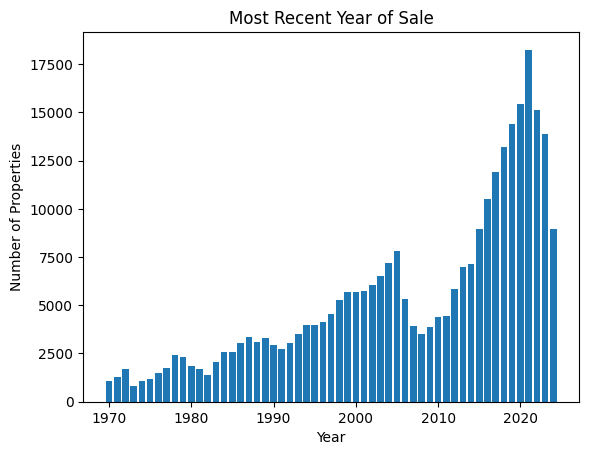

In [ ]:
x=df.groupby('PARCEL_NUMBER').agg({'SALES_YEAR':'max'}).value_counts().sort_index().reset_index()['SALES_YEAR'].values
y=df.groupby('PARCEL_NUMBER').agg({'SALES_YEAR':'max'}).value_counts().sort_index().reset_index()['count'].values

plt.bar(x=x,height=y)
plt.title('Most Recent Year of Sale')
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.show()

Doing a little investigating, the property is a parcel with multiple homes on it. It's property_use is 0810-parcel with multiple homes on it(6 it seems, looking at pcpao and gmaps). The parcel also seems to be 2 lots joined together, explaining the different land sizes.

Everytime a parcel with multiple homes on it is sold, the records get an update for each individual home. This parcel has 6 homes so 6 records. Since this parcel has 2 lots, each record gets duplicated for the second lot(6 more records.) The second lot's characteristics(land size) differs.

Something also noticed is that the Reconstruction Costs New(**RCN**) vary, indicating that the build cost for each house is different, helping to differentiate the records.

The PRICE listed on each record is the same, indicating the price is for the parcel_number and not for each individual house.

#Getting data on dimensions of properties.

Focus on physical measurements of the property
1. TOTAL_LIVING_SQFT
2. TOTAL_GROSS_SQFT
3. ACREAGE
4. LAND_AREA_SF

LAND_SIZE describes the dimensions of the property. A lot of records are missing the data.

In [ ]:
df[['TOTAL_LIVING_SQFT','TOTAL_GROSS_SQFT','ACREAGE','LAND_AREA_SF']].describe()

,TOTAL_LIVING_SQFT,TOTAL_GROSS_SQFT,ACREAGE,LAND_AREA_SF
count,964609.000000,964609.000000,964609.000000,964609.000000
mean,1577.566125,2083.632684,0.174210,7588.217478
std,800.965669,1241.231922,0.269986,11760.494903
min,0.000000,0.000000,0.000000,0.000000
25%,1070.000000,1263.000000,0.000000,0.000000
50%,1374.000000,1803.000000,0.160700,7000.000000
75%,1843.000000,2527.000000,0.213800,9313.000000
max,17675.000000,38872.000000,21.116400,919830.000000


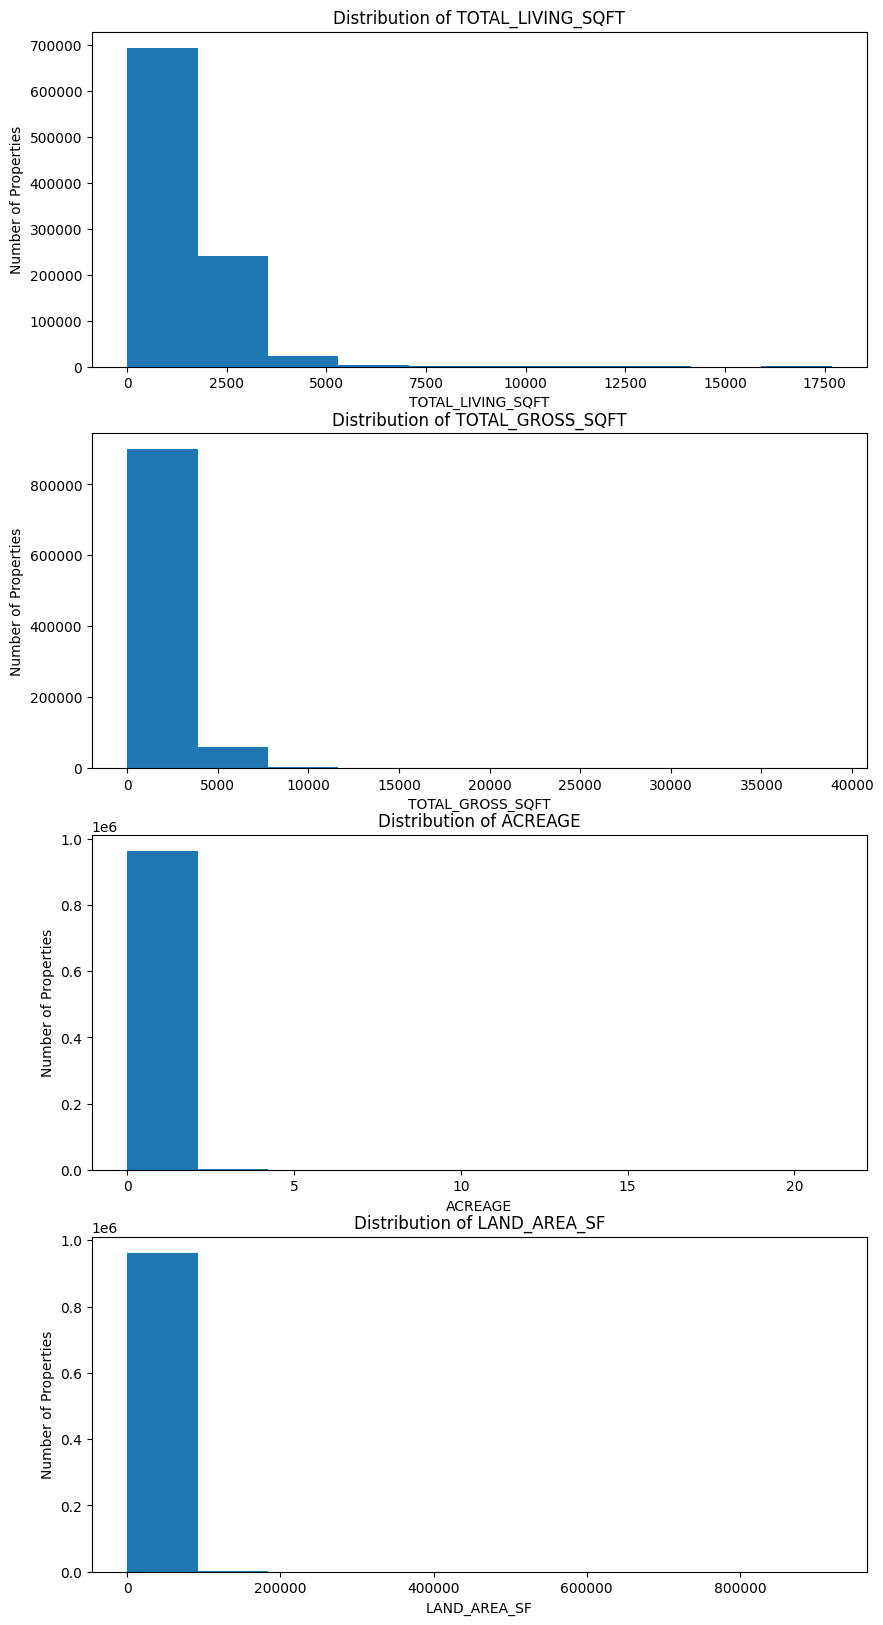

In [ ]:
fig,axs = plt.subplots(4)
fig.set_figheight(20)
fig.set_figwidth(10)
col = ['TOTAL_LIVING_SQFT','TOTAL_GROSS_SQFT','ACREAGE','LAND_AREA_SF']
for i in range(4):
  axs[i].hist(df[col[i]])
  axs[i].set_title('Distribution of '+col[i])
  axs[i].set_xlabel(col[i])
  axs[i].set_ylabel('Number of Properties')
plt.show()

The four values have some serious outliers to deal with(All likely the same property).

Also, I know there are some repeats of properties in the dataset. I really would just like to limit to the most recent sales information.

#THIS IS a BREAK. REVIEW WHAT TO KEEP

In [ ]:
df[['ROOF_COVER','ROOF_FRAME','FLOOR_FINISH','FLOOR_SYSTEM','FOUNDATION','INTERIOR_FINISH','EXTERIOR_WALLS','COOLING']].describe()
#

,ROOF_COVER,ROOF_FRAME,FLOOR_FINISH,FLOOR_SYSTEM,FOUNDATION,INTERIOR_FINISH,EXTERIOR_WALLS,COOLING
count,708927,708927,708927,708927,708927,708927,964609,694831
unique,11,3,5,4,6,5,14,1
top,Shingle Composition,Gable Or Hip,Carpet/Hardtile/Hardwood,Slab On Grade,Continuous Footing Poured,Drywall/Plaster,Cb Stucco/Cb Reclad,Cooling (Central)
freq,572165,695529,562574,574418,675382,560703,437327,694831


Let's focus on some specific values: ACREAGE, TOTAL_LIVING_SQFT, LAND_AREA_SF, YEAR_BUILT_BLD1, and PRICE.
Let's also run a correlation.

In [ ]:
df[['ACREAGE','TOTAL_LIVING_SQFT','LAND_AREA_SF','YEAR_BUILT_BLD1','SALES_YEAR','PRICE']].describe()

,ACREAGE,TOTAL_LIVING_SQFT,LAND_AREA_SF,YEAR_BUILT_BLD1,SALES_YEAR,PRICE
count,1.155164e+06,1.155156e+06,1.155164e+06,1.155098e+06,1.155164e+06,1.155164e+06
mean,1.565785e-01,1.531351e+03,6.820223e+03,1.973702e+03,1.998073e+03,1.856309e+05
std,2.873604e-01,8.116061e+02,1.251734e+04,1.819759e+01,1.530911e+01,6.501158e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,1.885000e+03,1.899000e+03,0.000000e+00
25%,0.000000e+00,1.040000e+03,0.000000e+00,1.961000e+03,1.985000e+03,4.810000e+04
50%,1.458000e-01,1.332000e+03,6.351000e+03,1.974000e+03,1.998000e+03,9.100000e+04
75%,2.015000e-01,1.792000e+03,8.777000e+03,1.984000e+03,2.012000e+03,1.950000e+05
max,6.010470e+01,2.676500e+04,2.618160e+06,2.024000e+03,2.024000e+03,6.000000e+07


In [ ]:
df[['ACREAGE','TOTAL_LIVING_SQFT','LAND_AREA_SF','YEAR_BUILT_BLD1','SALES_YEAR','PRICE']].corr()

,ACREAGE,TOTAL_LIVING_SQFT,LAND_AREA_SF,YEAR_BUILT_BLD1,SALES_YEAR,PRICE
ACREAGE,1.000000,0.441249,1.000000,-0.002145,-0.032125,0.048889
TOTAL_LIVING_SQFT,0.441249,1.000000,0.441246,0.270447,0.036614,0.183822
LAND_AREA_SF,1.000000,0.441246,1.000000,-0.002142,-0.032124,0.048890
YEAR_BUILT_BLD1,-0.002145,0.270447,-0.002142,1.000000,0.150998,0.138545
SALES_YEAR,-0.032125,0.036614,-0.032124,0.150998,1.000000,0.206883
PRICE,0.048889,0.183822,0.048890,0.138545,0.206883,1.000000


#Want to know about the addresses.
SITE_ADDRESS, SITE_CITYZIP, STR_NUM, STR_PFX, STR_NAME, STR_SFX, STR_SFX_DIR, STR_CITY, and STR_ZIP are the columns associated with the property address.

In [ ]:
address_info = df[['SITE_ADDRESS','SITE_CITYZIP','STR_NUM','STR_PFX','STR_NAME','STR_SFX','STR_SFX_DIR','STR_CITY','STR_ZIP']]

In [ ]:
address_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155164 entries, 0 to 1155163
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   SITE_ADDRESS  1155160 non-null  object
 1   SITE_CITYZIP  1155164 non-null  object
 2   STR_NUM       1155164 non-null  int64 
 3   STR_PFX       40900 non-null    object
 4   STR_NAME      1155160 non-null  object
 5   STR_SFX       1133155 non-null  object
 6   STR_SFX_DIR   468208 non-null   object
 7   STR_CITY      1155160 non-null  object
 8   STR_ZIP       1155160 non-null  object
dtypes: int64(1), object(8)
memory usage: 79.3+ MB


In [ ]:
address_info.head()

,SITE_ADDRESS,SITE_CITYZIP,STR_NUM,STR_PFX,STR_NAME,STR_SFX,STR_SFX_DIR,STR_CITY,STR_ZIP
0,1845 WILMAR AVE,"TARPON SPRINGS, FL 34689",1845,NaN,WILMAR,AVE,NaN,TARPON SPRINGS,34689
1,1815 WILMAR AVE,"TARPON SPRINGS, FL 34689",1815,NaN,WILMAR,AVE,NaN,TARPON SPRINGS,34689
2,1781 WILMAR AVE,"TARPON SPRINGS, FL 34689",1781,NaN,WILMAR,AVE,NaN,TARPON SPRINGS,34689
3,1824 WILMAR AVE,"TARPON SPRINGS, FL 34689",1824,NaN,WILMAR,AVE,NaN,TARPON SPRINGS,34689
4,1824 WILMAR AVE,"TARPON SPRINGS, FL 34689",1824,NaN,WILMAR,AVE,NaN,TARPON SPRINGS,34689


There are 4 records without a site address.

In [ ]:
address_info[address_info['SITE_ADDRESS'].isna()]

,SITE_ADDRESS,SITE_CITYZIP,STR_NUM,STR_PFX,STR_NAME,STR_SFX,STR_SFX_DIR,STR_CITY,STR_ZIP
1132323,NaN,", FL",0,NaN,NaN,NaN,NaN,NaN,NaN
1132324,NaN,", FL",0,NaN,NaN,NaN,NaN,NaN,NaN
1132325,NaN,", FL",0,NaN,NaN,NaN,NaN,NaN,NaN
1132326,NaN,", FL",0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.index.isin(address_info[address_info['SITE_ADDRESS'].isna()].index)]

,PARCEL_NUMBER,OWNER1,OWNER2,SITE_ADDRESS,SITE_CITYZIP,SUBDIVISION,LAND_SIZE,TOTAL_LIVING_SQFT,TOTAL_GROSS_SQFT,NBORHOOD_CD,...,EXTERIOR_WALLS,RCN,FLOOR_FINISH,FLOOR_SYSTEM,FOUNDATION,INTERIOR_FINISH,LIVING_UNITS,ROOF_COVER,ROOF_FRAME,PARCEL_TYPE
1132323,36-29-15-94104-004-0030,KWWM JOINT VENTURE LLC,TORRES INVESTMENTS LLC,NaN,", FL",VILLAGE GREEN SUB,65x112,1183.0,1538.0,2402.0,...,Frame Siding,186566.0,Carpet/ Vinyl/Asphalt,Slab On Grade,Continuous Footing Poured,Wood/Wallboard,1.0,Shingle Composition,Gable Or Hip,Residential
1132324,36-29-15-94104-004-0030,KWWM JOINT VENTURE LLC,TORRES INVESTMENTS LLC,NaN,", FL",VILLAGE GREEN SUB,65x112,1183.0,1538.0,2402.0,...,Frame Siding,186566.0,Carpet/ Vinyl/Asphalt,Slab On Grade,Continuous Footing Poured,Wood/Wallboard,1.0,Shingle Composition,Gable Or Hip,Residential
1132325,36-29-15-94104-004-0030,KWWM JOINT VENTURE LLC,TORRES INVESTMENTS LLC,NaN,", FL",VILLAGE GREEN SUB,65x112,1183.0,1538.0,2402.0,...,Frame Siding,186566.0,Carpet/ Vinyl/Asphalt,Slab On Grade,Continuous Footing Poured,Wood/Wallboard,1.0,Shingle Composition,Gable Or Hip,Residential
1132326,36-29-15-94104-004-0030,KWWM JOINT VENTURE LLC,TORRES INVESTMENTS LLC,NaN,", FL",VILLAGE GREEN SUB,65x112,1183.0,1538.0,2402.0,...,Frame Siding,186566.0,Carpet/ Vinyl/Asphalt,Slab On Grade,Continuous Footing Poured,Wood/Wallboard,1.0,Shingle Composition,Gable Or Hip,Residential


I found the address, by searching KWWM Joint Ventures on the PCPAO website(could have used the parcel_number; its only one parcel) I found the address: 205 Emerald Ln, LARGO, FL, 33771.

From this I have learned that the owner listed is always the current owner.

This parcel is missing all address information. That can be fixed in data cleaning.

Going to try to make the SITE_CITYZIP from combining STR_CITY and STR_ZIP. An assert statement might be the trick.

In [ ]:
#pd.testing.assert_series_equal(df['SITE_CITYZIP'],df['STR_CITY']+', FL '+df['STR_ZIP'])
'''
---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
<ipython-input-28-fabd43e7f18a> in <cell line: 1>()
----> 1 pd.testing.assert_series_equal(df['SITE_CITYZIP'],df['STR_CITY']+', FL '+df['STR_ZIP'])

    [... skipping hidden 1 frame]

testing.pyx in pandas._libs.testing.assert_almost_equal()

testing.pyx in pandas._libs.testing.assert_almost_equal()

/usr/local/lib/python3.10/dist-packages/pandas/_testing/asserters.py in raise_assert_detail(obj, message, left, right, diff, first_diff, index_values)
    596         msg += f"\n{first_diff}"
    597
--> 598     raise AssertionError(msg)
    599
    600

AssertionError: Series are different

Series values are different (0.00035 %)
[index]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
[left]:  [TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPO...
[right]: [TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPON SPRINGS, FL 34689, TARPO...
At positional index 1132323, first diff: , FL != nan
'''

'\n---------------------------------------------------------------------------\nAssertionError                            Traceback (most recent call last)\n<ipython-input-28-fabd43e7f18a> in <cell line: 1>()\n----> 1 pd.testing.assert_series_equal(df[\'SITE_CITYZIP\'],df[\'STR_CITY\']+\', FL \'+df[\'STR_ZIP\'])\n\n    [... skipping hidden 1 frame]\n\ntesting.pyx in pandas._libs.testing.assert_almost_equal()\n\ntesting.pyx in pandas._libs.testing.assert_almost_equal()\n\n/usr/local/lib/python3.10/dist-packages/pandas/_testing/asserters.py in raise_assert_detail(obj, message, left, right, diff, first_diff, index_values)\n    596         msg += f"\n{first_diff}"\n    597\n--> 598     raise AssertionError(msg)\n    599\n    600\n\nAssertionError: Series are different\n\nSeries values are different (0.00035 %)\n[index]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 4

The assert ran into problems at the 4 records mentioned above. So the SITE_CITYZIP and the STR_CITY and STR_ZIP seem to match well.

Going to check that the str_NuM, str_pfx, str_name, str_sfx, and str_sfx_dir all correctly combine to make the site_address 100% of the time.

To do this, I need the program to consider if a value is NaN or not. If it is Nan, I need the program to skip that value.

In [ ]:
for i in range(len(address_info)):
  new_address = ''
  if not pd.isna(address_info.loc[i,'STR_NUM']):
    new_address += str(address_info.loc[i,'STR_NUM']) + ' '
  if not pd.isna(address_info.loc[i,'STR_PFX']):
    new_address += str(address_info.loc[i,'STR_PFX']) + ' '
  if not pd.isna(address_info.loc[i,'STR_NAME']):
    new_address += str(address_info.loc[i,'STR_NAME']) + ' '
  if not pd.isna(address_info.loc[i,'STR_SFX']):
    new_address += str(address_info.loc[i,'STR_SFX'])
  if not pd.isna(address_info.loc[i,'STR_SFX_DIR']):
    new_address += ' ' + str(address_info.loc[i,'STR_SFX_DIR'])
  #print(new_address)
  address_info.loc[i,'NEW_ADDRESS'] = new_address

<ipython-input-10-0a4885860f44>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_info.loc[i,'NEW_ADDRESS'] = new_address


In [ ]:
#pd.testing.assert_series_equal(address_info['SITE_ADDRESS'],address_info['NEW_ADDRESS'])

'''
---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
<ipython-input-25-94055284141a> in <cell line: 1>()
----> 1 pd.testing.assert_series_equal(address_info['SITE_ADDRESS'],address_info['NEW_ADDRESS'])

    [... skipping hidden 1 frame]

testing.pyx in pandas._libs.testing.assert_almost_equal()

testing.pyx in pandas._libs.testing.assert_almost_equal()

/usr/local/lib/python3.10/dist-packages/pandas/_testing/asserters.py in raise_assert_detail(obj, message, left, right, diff, first_diff, index_values)
    596         msg += f"\n{first_diff}"
    597
--> 598     raise AssertionError(msg)
    599
    600

AssertionError: Series are different

Series values are different (28.64191 %)
[index]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
[left]:  [1845 WILMAR AVE, 1815 WILMAR AVE, 1781 WILMAR AVE, 1824 WILMAR AVE, 1824 WILMAR AVE, 1824 WILMAR AVE, 1824 WILMAR AVE, 1838 WILMAR AVE, 1838 WILMAR AVE, 534 BERKLEY AVE, 534 BERKLEY AVE, 534 BERKLEY AVE, 534 BERKLEY AVE, 534 BERKLEY AVE, 1819 ENGLEWOOD AVE, 1819 ENGLEWOOD AVE, 1819 ENGLEWOOD AVE, 1807 ENGLEWOOD AVE, 1771 ENGLEWOOD AVE, 1771 ENGLEWOOD AVE, 1747 ENGLEWOOD AVE, 1747 ENGLEWOOD AVE, 1605 ENGLEWOOD AVE, 1605 ENGLEWOOD AVE, 1605 ENGLEWOOD AVE, 1623 ENGLEWOOD AVE, 1623 ENGLEWOOD AVE, 1655 DIXIE HWY, 1655 DIXIE HWY, 1627 DIXIE HWY, 1617 DIXIE HWY, 1609 DIXIE HWY, 1601 DIXIE HWY, 1601 DIXIE HWY, 1748 ENGLEWOOD AVE, 1748 ENGLEWOOD AVE, 1748 ENGLEWOOD AVE, 1721 DIXIE HWY, 1721 DIXIE HWY, 1721 DIXIE HWY, 1808 ENGLEWOOD AVE, 1820 ENGLEWOOD AVE, 1820 ENGLEWOOD AVE, 1843 DIXIE HWY, 1843 DIXIE HWY, 1831 DIXIE HWY, 1831 DIXIE HWY, 1831 DIXIE HWY, 1831 DIXIE HWY, 1815 DIXIE HWY, 1815 DIXIE HWY, 1815 DIXIE HWY, 1660 WILMAR AVE, 1660 WILMAR AVE, 1660 WILMAR AVE, 1682 WILMAR AVE, 499 PASAJE AVE, 499 PASAJE AVE, 499 PASAJE AVE, 1615 WILMAR AVE, 1615 WILMAR AVE, 1615 WILMAR AVE, 1615 WILMAR AVE, 1627 WILMAR AVE, 1639 WILMAR AVE, 498 SEVILLA AVE, 1654 POINSETTIA AVE, 1654 POINSETTIA AVE, 1654 POINSETTIA AVE, 1654 POINSETTIA AVE, 477 PASAJE AVE, 477 PASAJE AVE, 477 PASAJE AVE, 477 PASAJE AVE, 1681 WILMAR AVE, 1705 WILMAR AVE, 1705 WILMAR AVE, 1748 WILMAR AVE, 1748 WILMAR AVE, 1752 POINSETTIA AVE, 1744 POINSETTIA AVE, 1736 POINSETTIA AVE, 1736 POINSETTIA AVE, 1736 POINSETT...
[right]: [1845 WILMAR AVE, 1815 WILMAR AVE, 1781 WILMAR AVE, 1824 WILMAR AVE, 1824 WILMAR AVE, 1824 WILMAR AVE, 1824 WILMAR AVE, 1838 WILMAR AVE, 1838 WILMAR AVE, 534 BERKLEY AVE, 534 BERKLEY AVE, 534 BERKLEY AVE, 534 BERKLEY AVE, 534 BERKLEY AVE, 1819 ENGLEWOOD AVE, 1819 ENGLEWOOD AVE, 1819 ENGLEWOOD AVE, 1807 ENGLEWOOD AVE, 1771 ENGLEWOOD AVE, 1771 ENGLEWOOD AVE, 1747 ENGLEWOOD AVE, 1747 ENGLEWOOD AVE, 1605 ENGLEWOOD AVE, 1605 ENGLEWOOD AVE, 1605 ENGLEWOOD AVE, 1623 ENGLEWOOD AVE, 1623 ENGLEWOOD AVE, 1655 DIXIE HWY, 1655 DIXIE HWY, 1627 DIXIE HWY, 1617 DIXIE HWY, 1609 DIXIE HWY, 1601 DIXIE HWY, 1601 DIXIE HWY, 1748 ENGLEWOOD AVE, 1748 ENGLEWOOD AVE, 1748 ENGLEWOOD AVE, 1721 DIXIE HWY, 1721 DIXIE HWY, 1721 DIXIE HWY, 1808 ENGLEWOOD AVE, 1820 ENGLEWOOD AVE, 1820 ENGLEWOOD AVE, 1843 DIXIE HWY, 1843 DIXIE HWY, 1831 DIXIE HWY, 1831 DIXIE HWY, 1831 DIXIE HWY, 1831 DIXIE HWY, 1815 DIXIE HWY, 1815 DIXIE HWY, 1815 DIXIE HWY, 1660 WILMAR AVE, 1660 WILMAR AVE, 1660 WILMAR AVE, 1682 WILMAR AVE, 499 PASAJE AVE, 499 PASAJE AVE, 499 PASAJE AVE, 1615 WILMAR AVE, 1615 WILMAR AVE, 1615 WILMAR AVE, 1615 WILMAR AVE, 1627 WILMAR AVE, 1639 WILMAR AVE, 498 SEVILLA AVE, 1654 POINSETTIA AVE, 1654 POINSETTIA AVE, 1654 POINSETTIA AVE, 1654 POINSETTIA AVE, 477 PASAJE AVE, 477 PASAJE AVE, 477 PASAJE AVE, 477 PASAJE AVE, 1681 WILMAR AVE, 1705 WILMAR AVE, 1705 WILMAR AVE, 1748 WILMAR AVE, 1748 WILMAR AVE, 1752 POINSETTIA AVE, 1744 POINSETTIA AVE, 1736 POINSETTIA AVE, 1736 POINSETTIA AVE, 1736 POINSETT...
At positional index 5444, first diff: 485 WESTLAKE BLVD # 65 != 485 WESTLAKE BLVD

'''

'\n---------------------------------------------------------------------------\nAssertionError                            Traceback (most recent call last)\n<ipython-input-25-94055284141a> in <cell line: 1>()\n----> 1 pd.testing.assert_series_equal(address_info[\'SITE_ADDRESS\'],address_info[\'NEW_ADDRESS\'])\n\n    [... skipping hidden 1 frame]\n\ntesting.pyx in pandas._libs.testing.assert_almost_equal()\n\ntesting.pyx in pandas._libs.testing.assert_almost_equal()\n\n/usr/local/lib/python3.10/dist-packages/pandas/_testing/asserters.py in raise_assert_detail(obj, message, left, right, diff, first_diff, index_values)\n    596         msg += f"\n{first_diff}"\n    597 \n--> 598     raise AssertionError(msg)\n    599 \n    600 \n\nAssertionError: Series are different\n\nSeries values are different (28.64191 %)\n[index]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 

So after some work the addresses seem to match well. I just don't have unit numbers for things like townhomes. Assuming the 485 WESTLAKE BLVD is in PALM HARBOR, there are 2 buildings with like 5 homes each.

#SALES/PRICES over TIME
Got a bit distracted with the last stuff. How are sales over time?

In [ ]:
yearly_sales = df.groupby(['SALES_YEAR']).size()

In [ ]:
yearly_sales

,0
SALES_YEAR,
1899,68
1944,1
1947,1
1950,1
1951,2
...,...
2020,26881
2021,31115
2022,23726


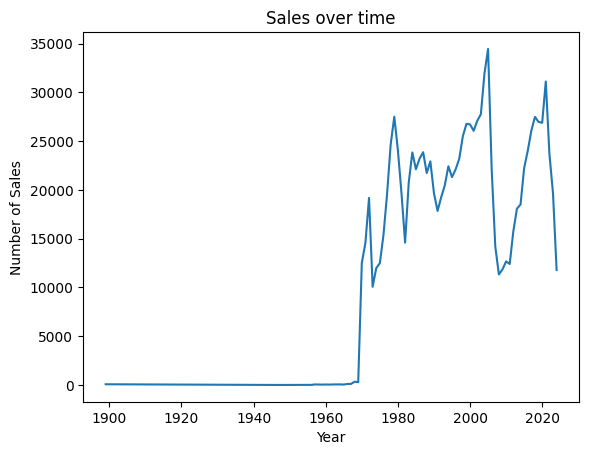

In [ ]:
plt.plot(yearly_sales)
plt.title('Sales over time')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

In [ ]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df.groupby('SALES_YEAR')['PRICE'].describe())

,count,mean,std,min,25%,50%,75%,max
SALES_YEAR,,,,,,,,
1899,68.0,613275.338235,4.884646e+06,0.0,0.0,9000.0,36250.0,40300161.0
1944,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
1947,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
1950,1.0,2000.000000,NaN,2000.0,2000.0,2000.0,2000.0,2000.0
1951,2.0,6800.000000,8.485281e+02,6200.0,6500.0,6800.0,7100.0,7400.0
1952,1.0,600.000000,NaN,600.0,600.0,600.0,600.0,600.0
1953,2.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1954,3.0,366.666667,6.350853e+02,0.0,0.0,0.0,550.0,1100.0
1955,7.0,542.857143,7.546680e+02,0.0,0.0,0.0,1100.0,1600.0


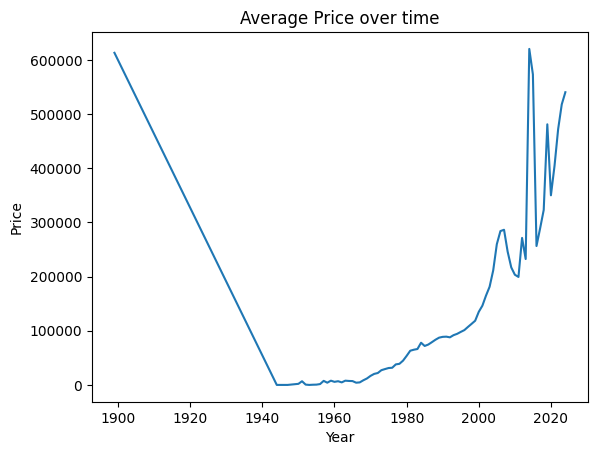

In [ ]:
df.groupby('SALES_YEAR')['PRICE'].mean().plot()
plt.title('Average Price over time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [ ]:
df['PRICE'].describe()

,PRICE
count,1.155164e+06
mean,1.856309e+05
std,6.501158e+05
min,0.000000e+00
25%,4.810000e+04
50%,9.100000e+04
75%,1.950000e+05
max,6.000000e+07


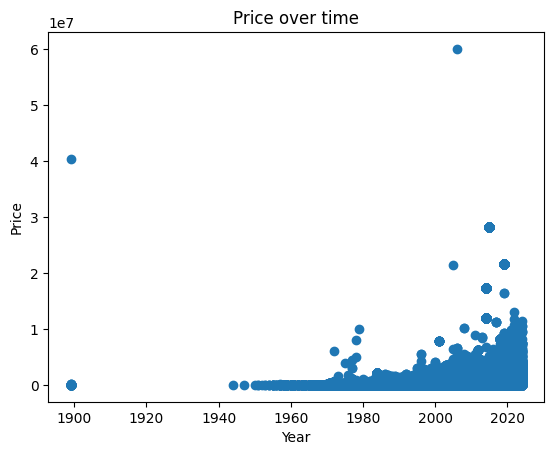

In [ ]:
plt.scatter(df['SALES_YEAR'],df['PRICE'])
plt.title('Price over time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Going to limit the graph in a bit

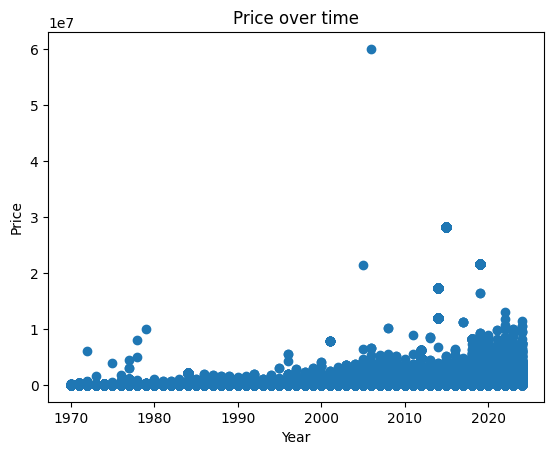

In [ ]:
df70 = df[df['SALES_YEAR']>=1970]
plt.scatter(df70['SALES_YEAR'],df70['PRICE'])
plt.title('Price over time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

<ipython-input-38-091206a37809>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,df70['PROPERTY_USE'].unique().tolist().index(property_use)+1)


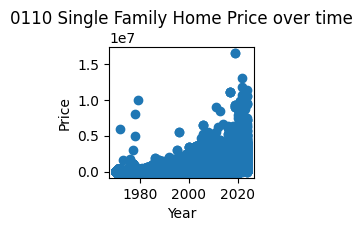

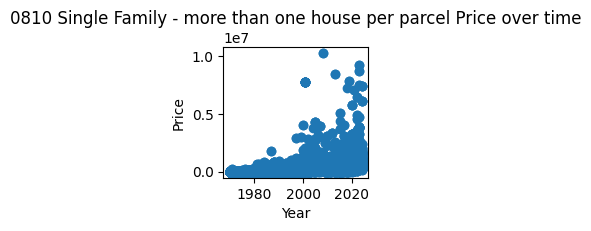

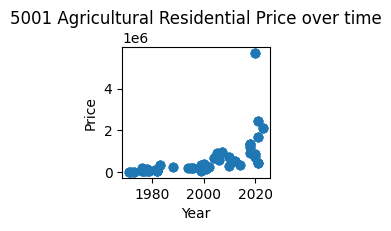

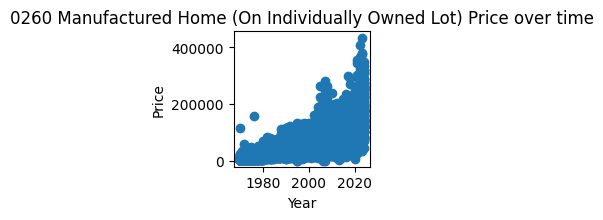

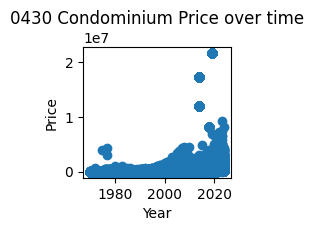

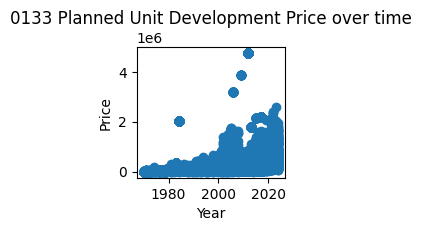

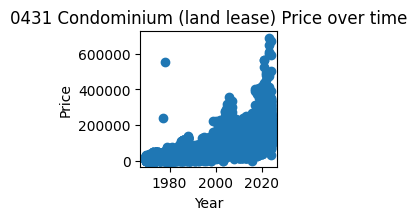

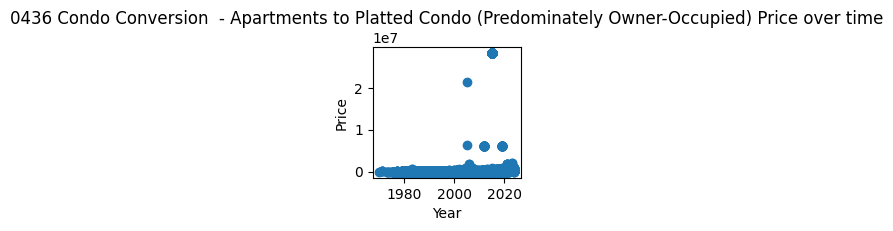

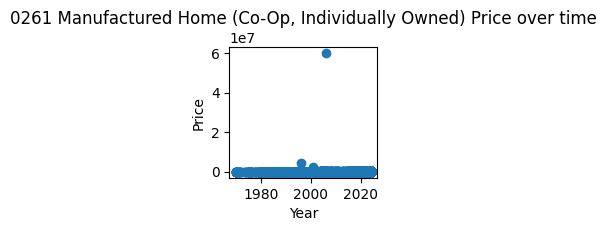

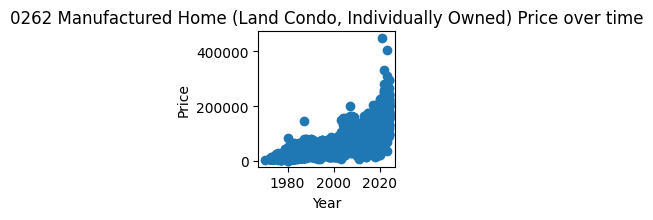

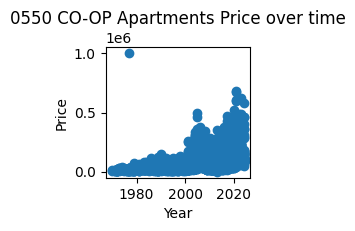

In [ ]:
#Trying to color the scatterplot with dots connected to their property use

for property_use in df70['PROPERTY_USE'].unique():
  x=df70[df70['PROPERTY_USE']==property_use]['SALES_YEAR']
  y=df70[df70['PROPERTY_USE']==property_use]['PRICE']
  plt.subplots(layout='constrained')
  plt.subplot(3,4,df70['PROPERTY_USE'].unique().tolist().index(property_use)+1)
  plt.scatter(x,y,label=property_use)
  plt.title(str(property_use)+' Price over time')
  plt.xlabel('Year')
  plt.ylabel('Price')
plt.show()

#Could Zillow data help give me the numbers of bedrooms and baths?

1.  I can find the number of unique parcels currently in the dataframe
2.  I know the number of properties I can pull data from on zillow.
3.  Dividing those, I can get an estimate for the percent of data that would have bed and bath data.
4.  I might be able to impute the rest of the data reasonably well.

In [ ]:
df['PARCEL_NUMBER'].nunique()

358774

358774 unique parcels are in the dataset. From Zillow, I currently see 82,674 properties that I could pull data from.

In [ ]:
82674/358774

0.23043475837156538

I would have bedroom and bath data for 23% of the parcels. I could maybe impute the rest of the data by looking at square footage.

#How many properties of each property use are there?
Are there a lot of multi-house parcels? I know most would be single-family homes.



I want to get for every unique parcel number its property use.

Problem: What if a parcel has had 2 property uses? *Not a problem it seems*

In [ ]:
df.groupby('PARCEL_NUMBER')['PROPERTY_USE'].nunique().sort_values(ascending=False).head(10 )

,PROPERTY_USE
PARCEL_NUMBER,
01-27-15-00864-002-0180,1
25-28-15-38033-009-1491,1
25-28-15-38033-011-1531,1
25-28-15-38033-011-1527,1
25-28-15-38033-011-1521,1
25-28-15-38033-010-1517,1
25-28-15-38033-010-1511,1
25-28-15-38033-010-1507,1
25-28-15-38033-010-1501,1


In [ ]:
df.groupby('PROPERTY_USE')['PARCEL_NUMBER'].nunique().sort_values(ascending=False)

,PARCEL_NUMBER
PROPERTY_USE,
0110 Single Family Home,219367
0430 Condominium,75868
0133 Planned Unit Development,21127
0436 Condo Conversion - Apartments to Platted Condo (Predominately Owner-Occupied),16121
"0261 Manufactured Home (Co-Op, Individually Owned)",9407
0431 Condominium (land lease),7901
0810 Single Family - more than one house per parcel,3364
0260 Manufactured Home (On Individually Owned Lot),2683
0550 CO-OP Apartments,1511
